In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# iris = pd.read_csv("../DATA/iris.csv")
iris  = pd.read_csv("iris.csv")

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Processing

### Features and Target

In [ ]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
X = iris.drop('species',axis=1)
y = iris['species']

In [ ]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
# Lots of ways to one hot encode
# https://stackoverflow.com/questions/47573293/unable-to-transform-string-column-to-categorical-matrix-using-keras-and-sklearn
# https://stackoverflow.com/questions/35107559/one-hot-encoding-of-string-categorical-features

In [ ]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Scaling

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaled_X_train = scaler.transform(X_train)

In [ ]:
scaled_X_test = scaler.transform(X_test)

## Model


### Creating the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

## Model Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(patience=10)

In [ ]:
model.fit(x=scaled_X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(scaled_X_test, y_test), verbose=1 ,callbacks=[early_stop]         )

Epoch 1/300
4/4 [==============================] - 1s 172ms/step - loss: 1.1957 - accuracy: 0.3398 - val_loss: 1.1809 - val_accuracy: 0.4000
Epoch 2/300
4/4 [==============================] - 0s 21ms/step - loss: 1.1867 - accuracy: 0.3148 - val_loss: 1.1738 - val_accuracy: 0.4000
Epoch 3/300
4/4 [==============================] - 0s 19ms/step - loss: 1.1789 - accuracy: 0.3060 - val_loss: 1.1668 - val_accuracy: 0.4000
Epoch 4/300
4/4 [==============================] - 0s 23ms/step - loss: 1.1416 - accuracy: 0.3519 - val_loss: 1.1603 - val_accuracy: 0.4000
Epoch 5/300
4/4 [==============================] - 0s 26ms/step - loss: 1.1548 - accuracy: 0.3258 - val_loss: 1.1541 - val_accuracy: 0.4000
Epoch 6/300
4/4 [==============================] - 0s 21ms/step - loss: 1.1345 - accuracy: 0.3165 - val_loss: 1.1482 - val_accuracy: 0.4000
Epoch 7/300
4/4 [==============================] - 0s 22ms/step - loss: 1.1573 - accuracy: 0.2706 - val_loss: 1.1424 - val_accuracy: 0.4000
Epoch 8/300
4/4 [==

## Model Evaluation

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.182682,0.341667,1.180873,0.400000
1,1.175237,0.341667,1.173782,0.400000
2,1.168105,0.325000,1.166843,0.400000
3,1.160630,0.325000,1.160323,0.400000
4,1.154334,0.325000,1.154061,0.400000
...,...,...,...,...
295,0.340262,0.916667,0.380325,0.933333
296,0.339254,0.916667,0.379466,0.933333
297,0.338445,0.916667,0.378541,0.933333
298,0.337618,0.916667,0.377676,0.933333


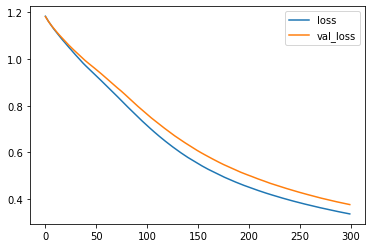

In [ ]:
metrics[['loss','val_loss']].plot()

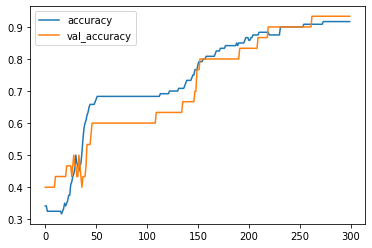

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.3767208456993103, 0.9333333373069763]

## Ready Model for Deployment

In [ ]:
epochs = len(metrics)

In [ ]:
scaled_X = scaler.fit_transform(X)

In [ ]:
model = Sequential()
model.add(Dense(units=4,activation='relu'))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(scaled_X,y,epochs=epochs)

Epoch 1/300
5/5 [==============================] - 0s 4ms/step - loss: 1.4321 - accuracy: 0.3212
Epoch 2/300
5/5 [==============================] - 0s 2ms/step - loss: 1.4828 - accuracy: 0.2886
Epoch 3/300
5/5 [==============================] - 0s 3ms/step - loss: 1.4775 - accuracy: 0.2986
Epoch 4/300
5/5 [==============================] - 0s 3ms/step - loss: 1.4018 - accuracy: 0.3229
Epoch 5/300
5/5 [==============================] - 0s 3ms/step - loss: 1.4397 - accuracy: 0.2760
Epoch 6/300
5/5 [==============================] - 0s 3ms/step - loss: 1.3551 - accuracy: 0.3124
Epoch 7/300
5/5 [==============================] - 0s 3ms/step - loss: 1.3789 - accuracy: 0.3120
Epoch 8/300
5/5 [==============================] - 0s 3ms/step - loss: 1.3129 - accuracy: 0.3567
Epoch 9/300
5/5 [==============================] - 0s 3ms/step - loss: 1.3517 - accuracy: 0.3385
Epoch 10/300
5/5 [==============================] - 0s 4ms/step - loss: 1.3256 - accuracy: 0.3242
Epoch 11/300
5/5 [===========

In [ ]:
model.save("final_iris_model.h5")

### Saving Scaler

In [ ]:
import joblib

In [ ]:
joblib.dump(scaler,'iris_scaler.pkl')

['iris_scaler.pkl']

## Predicting a Single New Flower

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
flower_model = load_model("final_iris_model.h5")
flower_scaler = joblib.load("iris_scaler.pkl")

In [ ]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [ ]:
flower_example = {'sepal_length':5.1,
                 'sepal_width':3.5,
                 'petal_length':1.4,
                 'petal_width':0.2}

In [ ]:
flower_example.keys()

dict_keys(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [ ]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    class_ind = model.predict_classes(flower)
    
    return classes[class_ind][0]
                    

In [2]:
import joblib
import pickle


# model = pickle.dump(model,open('model.'))
pickle.dump(model,open('model.pkl','wb'))





In [ ]:
return_prediction(flower_model,flower_scaler,flower_example)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'setosa'

# CODE FOR DEPLOYMENT:

In [ ]:
from tensorflow.keras.models import load_model
import joblib


flower_model = load_model("final_iris_model.h5")
flower_scaler = joblib.load("iris_scaler.pkl")


def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    class_ind = model.predict_classes(flower)
    
    return classes[class_ind][0]


  

In [ ]:
flower_example = {
"sepal_length":5.1,
"sepal_width":3.5,
"petal_length":1.4,
"petal_width":0.2
}

In [ ]:
import requests

In [1]:
# result = requests.post("http://locpspdfkitalhost:5000/api/flower",json = flower_example)